In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Import Machine Learning Model
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay

In [2]:
data = pd.read_csv('../Tugas/breast-cancer.data', delimiter=',')

In [3]:
data

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no
...,...,...,...,...,...,...,...,...,...,...
281,recurrence-events,30-39,premeno,30-34,0-2,no,2,left,left_up,no
282,recurrence-events,30-39,premeno,20-24,0-2,no,3,left,left_up,yes
283,recurrence-events,60-69,ge40,20-24,0-2,no,1,right,left_up,no
284,recurrence-events,40-49,ge40,30-34,3-5,no,3,left,left_low,no


In [4]:
data.isna().sum()

Class          0
age            0
menopause      0
tumor-size     0
inv-nodes      0
node-caps      0
deg-malig      0
breast         0
breast-quad    0
irradiat       0
dtype: int64

In [5]:
data.duplicated().sum()

14

In [6]:
data.drop_duplicates(inplace=True)

In [7]:
data.duplicated().sum()

0

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 272 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Class        272 non-null    object
 1   age          272 non-null    object
 2   menopause    272 non-null    object
 3   tumor-size   272 non-null    object
 4   inv-nodes    272 non-null    object
 5   node-caps    272 non-null    object
 6   deg-malig    272 non-null    int64 
 7   breast       272 non-null    object
 8   breast-quad  272 non-null    object
 9   irradiat     272 non-null    object
dtypes: int64(1), object(9)
memory usage: 23.4+ KB


In [9]:
data_x = data[['age','menopause','tumor-size','inv-nodes','node-caps','deg-malig','breast','breast-quad']] #Feature
data_y = data["irradiat"] #Target

In [10]:
data_x = pd.get_dummies(data_x)

In [11]:
LabeEncode = LabelEncoder()

In [12]:
data_y = LabeEncode.fit_transform(data_y)

In [67]:
ss = StandardScaler()

In [69]:
data_x_ss = ss.fit_transform(data_x)

In [70]:
x_train, x_test, y_train, y_test = train_test_split(data_x_ss, data_y, test_size=.2)

In [71]:
print(f'panjang x train : {len(x_train)}\n',
f'panjang y train : {len(y_train)}\n',
f'panjang x test : {len(x_test)}\n',
f'panjang y test : {len(y_test)}\n')

panjang x train : 217
 panjang y train : 217
 panjang x test : 55
 panjang y test : 55



### Membuat Model klasifikasi disini kami menggunakan Naive Bayes

In [72]:
NB = GaussianNB()

### Melakukan Fit Model yang telah dibuat

In [73]:
NB.fit(x_train, y_train)

GaussianNB()

### Ratio Train, Test 80:20

In [74]:
NB.score(x_ss_test, y_test)

ValueError: Found input variables with inconsistent numbers of samples: [55, 217]

### Ratio Train, Test 70:30

In [19]:
NB.score(x_train, y_test)

0.7804878048780488

### Ration Train, Test 60:40

In [31]:
NB.score(x_train, y_test)

0.6972477064220184

### Menghitung Hasil Prediksi

In [47]:
pred_val = NB.predict(x_ss_test)
acc = accuracy_score(y_test, pred_val)

### Menampilkan Hasil Prediksi

In [48]:
print(f'hasil prediksi : {pred_val}',
    f'Class : {y_test}',
    f'akurasi : {acc}',
    sep='\n')

hasil prediksi : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
Class : [1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0]
akurasi : 0.8181818181818182


### Confusion Matrix
- 0 True Label = NO di Nilai Aktual
- 1 True Label = YES di Nilai Aktual
- 0 predicted Label = NO di nilai prediksi
- 1 predicted Label = YES di nilai prediksi

<Figure size 720x720 with 0 Axes>

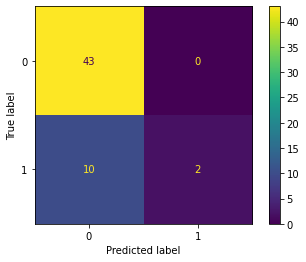

In [49]:
plt.figure(figsize=(10,10))
ConfusionMatrixDisplay.from_predictions(y_test, pred_val)
plt.show()

### Hasil Confusion Matrix
- 10 false negative
- 43 true positive
- 2 true negative
- 0 false positive

### Classification Report

In [62]:
from sklearn.metrics import classification_report

- Precision dari semua class yang diprediksi positive berapa jumlah yang benar benar positive hasilnya
- Recall dari semua class yang positive berapa yang betul betul positive
- f1-score nilai tengah rata rata dari precission dan recall

- precision 0 = true positive : (true positive + false negative)
- |precision 1 = false positive : (false positive + true negative)

In [64]:

print(classification_report(pred_val, y_test))

              precision    recall  f1-score   support

           0       1.00      0.81      0.90        53
           1       0.17      1.00      0.29         2

    accuracy                           0.82        55
   macro avg       0.58      0.91      0.59        55
weighted avg       0.97      0.82      0.87        55

